<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/Table_07_and_08_True/Hybrid_Frannk_Bent_Cigar_gen_2000_par_100_dim_30_mar_21_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 719.00 KiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight


In [2]:
# PSO 2016 
#  Gen =1000,1500, 2000
#  Npar= 20, 40, 80
#  dim = 10,20,30
# Dynamic parameter adaptation in particle swarm optimization
#  using interval type-2 fuzzy logic -Soft Comput (2016) 20:1057–1070

In [3]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 248 (delta 64), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (248/248), 654.97 KiB | 1.48 MiB/s, done.
Resolving deltas: 100% (136/136), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [4]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
#import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão
fator = 2.0/3.0; 



In [5]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 2.54 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [6]:
#!git clone https://github.com/ucfilho/Raianars_paper_one_revisited/AddFunctions 
!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [7]:
############################### Função
import FunctionsNew
#'''  
############################### Função
dim=30 # 
fchoice='Bent_Cigar'
Fun=FunctionsNew.Bent_Cigar
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)
 #fx=
#'''
#####################################
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [8]:
!ls

FunctionsNew.py  __pycache__  README.md


In [9]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/ANN_read_matrix


In [10]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [11]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [12]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [13]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [14]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [15]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [16]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);print('Npar1=',NPAR1);print('frac=',fator)
NPAR2=NPAR-NPAR1;print('Npar2=',NPAR2);print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


Npar1= 66
frac= 0.6666666666666666
Npar2= 34
Npar= 100


In [17]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):

      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut, crossp,NPAR2, its,fobj,X2)
      
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;
      X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;
      X2[NPAR2-1,:] = BEST2;
    print('k=',iii,'time=',(time.time()-start_time)/60)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 1.630214480559031
k= 1 time= 3.2573397835095723
k= 2 time= 4.913989106814067
k= 3 time= 6.565267507235209
k= 4 time= 8.199376630783082
k= 5 time= 9.842337810993195
k= 6 time= 11.474704265594482
k= 7 time= 13.127835059165955
k= 8 time= 14.758923224608104
k= 9 time= 16.416193675994872
k= 10 time= 18.07582540909449
k= 11 time= 19.709165362517037
k= 12 time= 21.339967183272044
k= 13 time= 22.98618464867274
k= 14 time= 24.62247142394384
k= 15 time= 26.27810982465744
k= 16 time= 27.904590980211893
k= 17 time= 29.5669948498408
k= 18 time= 31.220242083072662
k= 19 time= 32.84908359845479
k= 20 time= 34.51472322940826
k= 21 time= 36.170201206207274
k= 22 time= 37.81855411926905
k= 23 time= 39.47829659779867
k= 24 time= 41.10736748377482
k= 25 time= 42.7404798189799
k= 26 time= 44.39514661629995
k= 27 time= 46.03039696216583
k= 28 time= 47.68922233581543
k= 29 time= 49.32367922862371
k= 30 time= 50.98444058895111
k= 31 time= 52.63592905203502
k= 32 time= 54.29819045861562
k= 33 time= 

In [18]:
X1.shape

(66, 30)

In [19]:
#len(X2[1,:])
print(cols)

30


In [20]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [21]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)   DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0         3.021123e+02  9.673536e-01   0.00022         1.0      2.0  66.0   
1         2.932176e+02  9.388729e-01   0.00044         1.0      2.0  66.0   
2         2.868475e+02  9.184760e-01   0.00066         0.0      0.0  66.0   
3         2.817332e+02  9.021001e-01   0.00088         1.0      2.0  66.0   
4         2.771812e+02  8.875250e-01   0.00110         0.0      0.0  66.0   
...                ...           ...       ...         ...      ...   ...   
1995      3.866921e-18  1.238175e-20   0.43912         1.0      1.0  66.0   
1996      3.836975e-18  1.228586e-20   0.43934         1.0      1.0  66.0   
1997      3.836964e-18  1.228583e-20   0.43956         0.0      0.0  66.0   
1998      3.846261e-18  1.231560e-20   0.43978         1.0      1.0  66.0   
1999      3.888529e-18  1.245094e-20   0.44000         0.0      0.0  66.0   

            Fo       CRo          fmin          fmax  AD_fmin  AD_fmax  \
0

Text(0, 0.5, 'CR')

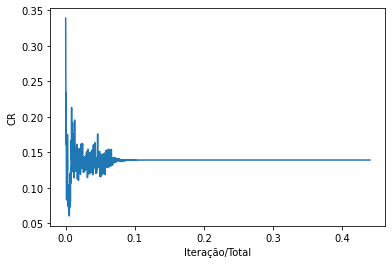

In [22]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

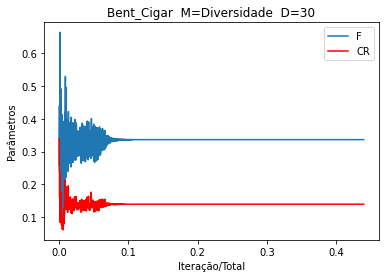

In [23]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Bent_Cigar_Diversidade_D=30')

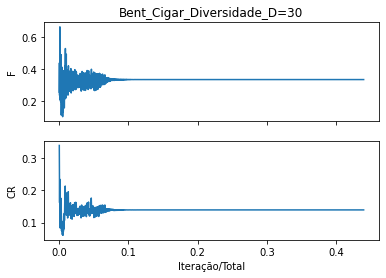

In [24]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [25]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 300000 Iterações= 2000 Dim= 30 Min/Max= -100 / 100 _ Bent_Cigar
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-2000 

MÉDIA:  1.7489481078941296e-28
MIN __: 6.869150627747198e-36
MAX__:  7.412851992791222e-28
STD __: 2.2191407690375546e-28
Tempo Médio= 98.653 segundos ---
50 Rodadas

BEST:  [ 4.51829882e-19 -8.59854374e-23 -5.44387032e-22 -4.26903374e-22
  8.45295731e-23  2.20215078e-22  7.09451338e-22 -4.61701790e-22
 -3.58072167e-22  3.64468346e-22 -6.07010045e-22  1.31237886e-21
 -1.56950417e-22  1.23305628e-22  1.89629440e-22  6.20174698e-23
 -2.43520065e-22 -8.57993063e-23 -3.40320710e-22  3.94332569e-22
  4.70270447e-22  2.24492892e-22 -3.48678909e-22 -6.68694973e-22
 -5.65480704e-23  6.67162409e-22  4.41172058e-22  4.44470296e-22
 -1.87239280e-22 -9.59983453e-22  6.86915063e-36]
